In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('A_Z Handwritten Data.csv').astype('float32')
data.head(10)

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X = data.drop('0',axis = 1)
y = data['0']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
x_train = np.reshape(x_train.values, (x_train.shape[0], 28,28))
x_test = np.reshape(x_test.values, (x_test.shape[0], 28,28))

print("Shape of Training data: ", x_train.shape)
print("Shape of Testing data: ", x_test.shape)

Shape of Training data:  (12458, 28, 28)
Shape of Testing data:  (3115, 28, 28)


In [ ]:
shuffle_data = shuffle(x_train)

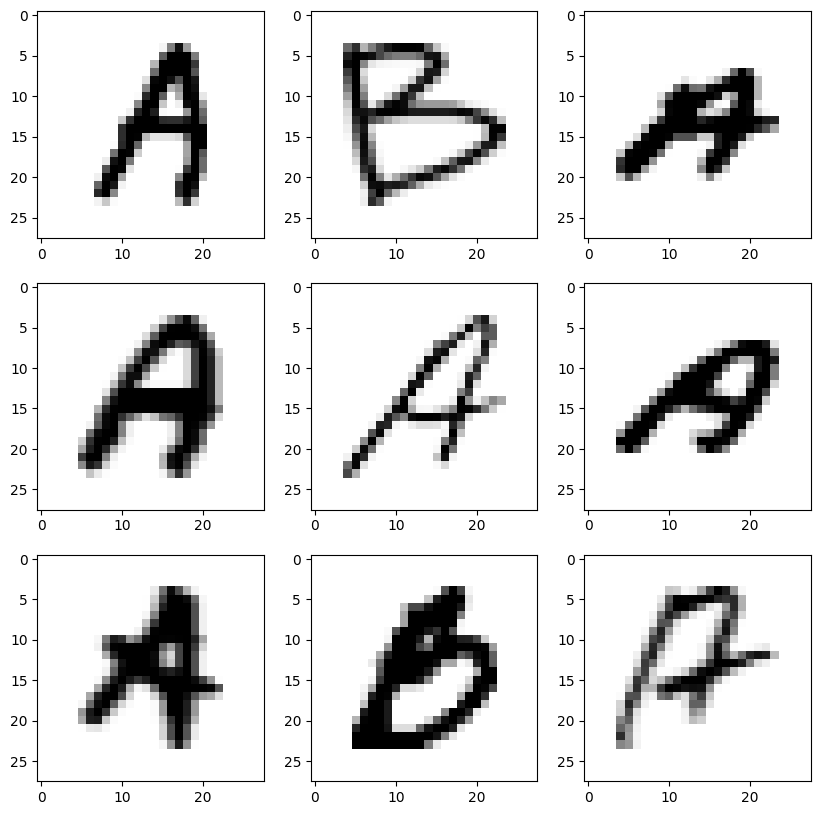

In [ ]:
import cv2
fig, axes = plt.subplots(3,3, figsize = (10,10))
axes = axes.flatten()
for i in range(9):
    shu = cv2.threshold(shuffle_data[i], 30, 200, cv2.THRESH_BINARY)
    axes[i].imshow(np.reshape(shuffle_data[i], (28,28)), cmap="Greys")
plt.show()

In [ ]:
#training of our model.
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2],1)
print("New shape of training data: ", x_train.shape)
print("New shape of testing data: ", x_test.shape)

New shape of training data:  (12458, 28, 28, 1)
New shape of testing data:  (3115, 28, 28, 1)


In [ ]:
import tensorflow
from tensorflow.keras.utils import to_categorical
y_training = to_categorical(y_train, num_classes = 26, dtype='int')
y_testing = to_categorical(y_test, num_classes = 26, dtype='int')

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [ ]:
#Deep Learning-unsupervised learning

In [ ]:
model = Sequential()

model.add(Conv2D(64 , (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(2, 2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(2, 2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Flatten())

model.add(Dense(128,activation ="relu"))
model.add(Dense(256,activation ="relu"))
model.add(Dense(26,activation ="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)         0

In [ ]:
model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_training, epochs=5,  validation_data = (x_test,y_testing))

Epoch 1/5
390/390 [==============================] - 30s 72ms/step - loss: nan - accuracy: 0.9729 - val_loss: nan - val_accuracy: 0.8931
Epoch 2/5
390/390 [==============================] - 29s 75ms/step - loss: nan - accuracy: 0.8900 - val_loss: nan - val_accuracy: 0.8931
Epoch 3/5
390/390 [==============================] - 22s 57ms/step - loss: nan - accuracy: 0.8900 - val_loss: nan - val_accuracy: 0.8931
Epoch 4/5
390/390 [==============================] - 21s 54ms/step - loss: nan - accuracy: 0.8900 - val_loss: nan - val_accuracy: 0.8931
Epoch 5/5
390/390 [==============================] - 22s 57ms/step - loss: nan - accuracy: 0.8900 - val_loss: nan - val_accuracy: 0.8931


In [ ]:
model.save(r'handwritten_character_recog_model.h5')

In [ ]:
words = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

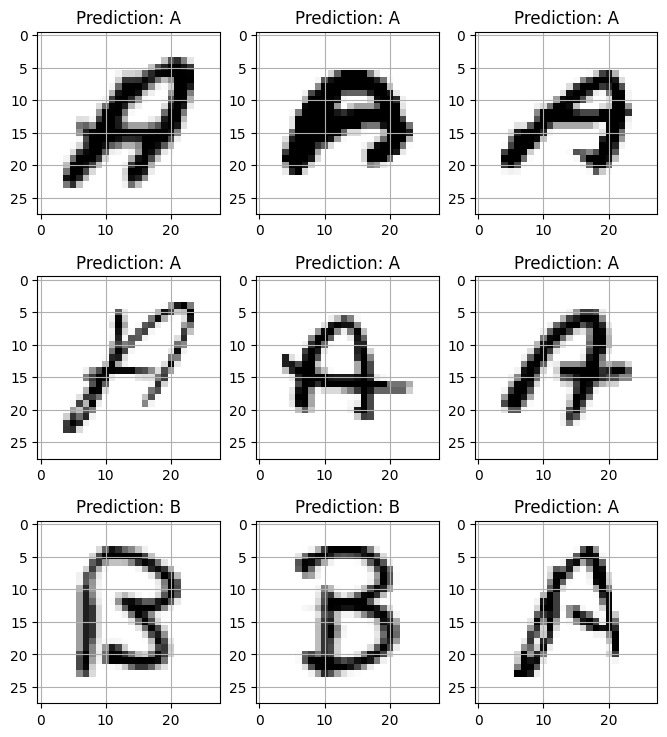

In [ ]:
fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()
for i,ax in enumerate(axes):
    image = np.reshape(x_test[i], (28,28))
    ax.imshow(image, cmap="Greys")
    pred = words[np.argmax(y_testing[i])]
    ax.set_title("Prediction: "+pred)
    ax.grid()